In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from skimage.filters import laplace
from skimage.measure import perimeter
from scipy.stats import entropy
import data
from matplotlib import rcParams

In [2]:
%%time
data.split_validation_data(0.26)

Foram encontradas 63 amostras, totalizando 126 arquivos. Dados para treinamento: 47 amostras (74.60%). Dados para validação: 16 amostras (25.40%).
CPU times: total: 109 ms
Wall time: 113 ms


In [3]:
%%time
data.update_info()

CPU times: total: 26.9 s
Wall time: 38.9 s


In [4]:
info = data.get_info()
info.head()

,area,train,freq,slope,label_pixel_area
0,14.172,True,0.078125,0.360721,2291.0
1,20.623,False,0.039062,3.967936,12731.0
2,22.713,False,0.050781,177.835671,8560.0
3,30.635,False,0.078125,180.000000,5039.0
4,33.924,True,0.058594,91.983968,10072.0


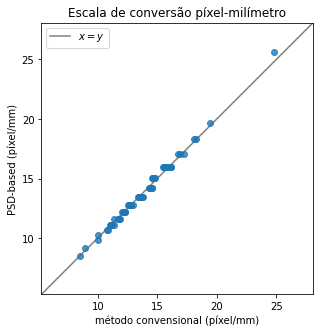

In [5]:
_, ax = plt.subplots(figsize=(5, 5))

x = np.sqrt(info.label_pixel_area/info.area).values
y = 1/info.freq
plt.plot(x, y, 'o', zorder=2, alpha=0.8, fillstyle='full')

t = np.linspace(x.min()-x.ptp()*0.25, x.max()+x.ptp()*0.25)
plt.plot(t, t, c='k', label=r'$x=y$', zorder=0, alpha=0.5)

plt.xlabel('método convensional (píxel/mm)')
plt.ylabel('PSD-based (píxel/mm)')
ax.set_aspect('equal')
plt.legend()
plt.xlim(x.min()-x.ptp()*0.2, x.max()+x.ptp()*0.2)
plt.ylim(x.min()-x.ptp()*0.2, x.max()+x.ptp()*0.2)
plt.title('Escala de conversão píxel-milímetro')

plt.show()

In [6]:
%%time
dataset = (x_train, y_train), (x_test, y_test) = data.load_dataset(augmentation=False)

CPU times: total: 891 ms
Wall time: 1.35 s


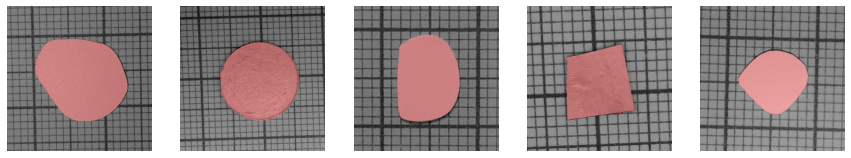

In [7]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in zip(np.random.randint(0, len(x_train), 5), axs.flat):
    ax.imshow(label2rgb(y_train[i], x_train[i]))
    ax.axis('off')
plt.show()

In [8]:
pieces = {
    'inner':{'train':[], 'test':[]},
    'outter':{'train':[], 'test':[]}
}
for split, (X, Y) in zip(('train', 'test'), dataset):
    for x, y in zip(X, Y):
        pieces['inner'][split].append(x[y.astype(bool)])
        pieces['outter'][split].append(x[~y.astype(bool)])

In [9]:
def scatter(func1, func2, show=True):
    plt.xlabel(func1.__name__)
    plt.ylabel(func2.__name__)
    func1, func2 = data.mapper(func1), data.mapper(func2)
    for i, (region, part) in enumerate(pieces.items()):
        for j, (split, values) in enumerate(part.items()):
            plt.scatter(func1(values), func2(values), 
                        marker=('+', 'v')[j],
                        c=('tab:blue', 'tab:red')[i], 
                        label=f'{region} {split}', alpha=0.7)
    plt.legend()
    if show: plt.show()

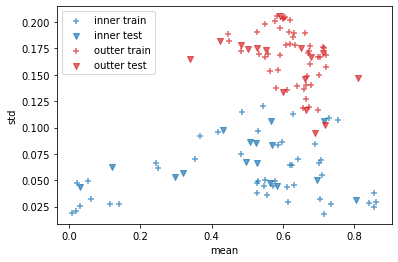

In [10]:
scatter(np.mean, np.std)

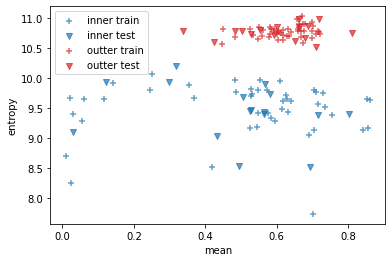

In [11]:
scatter(np.mean, entropy)

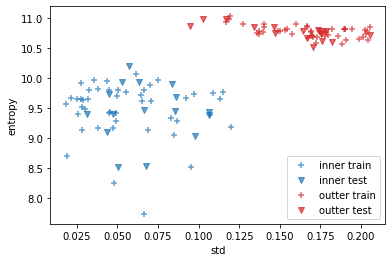

In [12]:
scatter(np.std, entropy)